# Lab 3

Author: Justin Ventura [[jventura3@gulls.salisbury.edu]]

Date: Thursday, September 17th, 2020.

## - Description -

This is where the fun begins >:)

### Import libraries which will be used and extract data:

In [3]:
# Libraries we shall be using.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer # start = timer(), end = timer()

a_frame = pd.read_csv("adult.data", header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ])
print('a_frame(row, col) =', a_frame.shape)
a_frame.head(9) # Print the first 9 entries.

a_frame(row, col) = (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


1) Pivoting the data.  

#### a) Rank occupation by most likely to make an income over $50k yearly.

In [4]:
# Create a sub-frame of the adult data with just the columns 'occupation' and 'income'.
occ_income = a_frame[['occupation', 'income']]

# Create two sub-frames of the previous sub-frame corresponding to two groups:
# Group 1: all of those who make over $50K, grouped by occupation, and
# Group 2: all of those who make under $50K, grouped by occupation.
greater = occ_income[occ_income['income'] == '>50K'].groupby('occupation').count()
lesser =  occ_income[occ_income['income'] == '<=50K'].groupby('occupation').count()

# Find the ratio for each occupation as a:b where a is the number of
# individuals who make over $50K, and b is the total number in that
# sample occupation.
totals = []
for pair in zip(greater['income'].tolist(), lesser['income'].tolist()):
    totals.append(sum(pair))

# This is simply the list of unique occupations in the dataaframe.
occ_list = sorted(set(occ_income['occupation']))

# Just putting ratios next to their corresponding occupation
ratios = list(zip([pair[0]/pair[1] for pair in zip(greater['income'].tolist(), totals)], occ_list))

# Ignore the useless data (row of '?')
ratios.pop(0)

print("Occupations most to least likely to make over $50K annually based on sample:")
for elem in sorted(ratios, reverse=True):
    print('- ', elem[1], end='.\n')

Occupations most to least likely to make over $50K annually based on sample:
-  Exec-managerial.
-  Prof-specialty.
-  Protective-serv.
-  Tech-support.
-  Sales.
-  Craft-repair.
-  Transport-moving.
-  Adm-clerical.
-  Machine-op-inspct.
-  Farming-fishing.
-  Armed-Forces.
-  Handlers-cleaners.
-  Other-service.
-  Priv-house-serv.


### b) Calculate the median age of people who make more and less than $50k. Calculate the medians for each again, but now split apart by the sex of the adults.



In [5]:
# NOTE: Creating a sub-frame that contain: age, sex, and income.
#       Then two sub-sub-frames which are split by income class.
age_sex_income = a_frame[['age', 'sex', 'income']]
upper_income = age_sex_income[age_sex_income['income'] == '>50K']
lower_income = age_sex_income[age_sex_income['income'] == '<=50K']

# Calculate the upper & lower medians for BOTH genders.
upper_median = np.median(upper_income.loc[:,'age'].tolist())
lower_median = np.median(lower_income.loc[:,'age'].tolist())

# Calculate the upper & lower medians for MALES.
m_upper_median = np.median(upper_income[upper_income['sex'] == 'Male'].loc[:, 'age'].tolist())
m_lower_median = np.median(lower_income[lower_income['sex'] == 'Male'].loc[:, 'age'].tolist())

# Calculate the upper & lower medians for FEMALES.
f_upper_median = np.median(upper_income[upper_income['sex'] == 'Female'].loc[:, 'age'].tolist())
f_lower_median = np.median(lower_income[lower_income['sex'] == 'Female'].loc[:, 'age'].tolist())

print('      ----- Median Ages ----')
print('Income:      >50K     <=50K|')
print('Male  | ', m_upper_median, m_lower_median, sep='     ', end=' |\n')
print('Female| ', f_upper_median, f_lower_median, sep='     ', end=' |\n')
print('      ----------------------')
print('BOTH  | ', upper_median, lower_median, sep='     ', end=' |\n')
print('      ----------------------')

      ----- Median Ages ----
Income:      >50K     <=50K|
Male  |      44.0     35.0 |
Female|      41.0     34.0 |
      ----------------------
BOTH  |      44.0     34.0 |
      ----------------------


### C) Calculate the mean and median number of years of education held by adults who make more and less than $50k.

In [6]:
# NOTE: Creating a sub-frame that contain: age, edu, and income.
#       Then two sub-sub-frames which are split by income class.
age_edu_income = a_frame[['age', 'education-num', 'income']]
upper_income = age_edu_income[age_edu_income['income'] == '>50K']
lower_income = age_edu_income[age_edu_income['income'] == '<=50K']

# First we calculate the mean and median years of edu for the upper income class.
upper_median = np.median(upper_income.loc[:, 'education-num'].tolist())
upper_mean = np.mean(upper_income.loc[:, 'education-num'].tolist())

# Then we calculate the same statistics on years of edu for the lower income class.
lower_median = np.median(lower_income.loc[:, 'education-num'].tolist())
lower_mean = np.mean(lower_income.loc[:, 'education-num'].tolist())

# NOTE: biased downwards?
print('-> Upper Income Years Of Education Held.')
print('>  Mean: ', upper_mean, 'years')
print('>  Median: ', upper_median, 'years', end='\n\n')

# NOTE: biased upwards?
print('-> Lower Income Years Of Education Held.')
print('>  Mean: ', lower_mean, 'years')
print('>  Median: ', lower_median, 'years')

-> Upper Income Years Of Education Held.
>  Mean:  11.611656676444332 years
>  Median:  12.0 years

-> Lower Income Years Of Education Held.
>  Mean:  9.595064724919094 years
>  Median:  9.0 years


### D) Plot a histogram to see the distribution of years of school held by adults who make more and less than $50k.

Note that the median looks pretty accurate on the histograms as compared to the previous section.

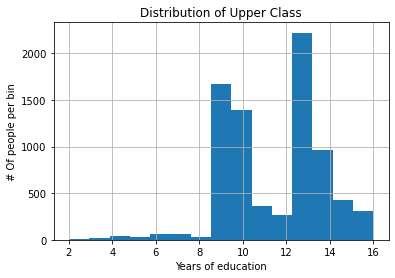

In [7]:
# NOTE: we will plot some epic histograms [Upper Class]!
plt.title('Distribution of Upper Class')
plt.xlabel('Years of education')
plt.ylabel('# Of people per bin')
upper_income_hist = upper_income['education-num'].hist(bins=15)

[]

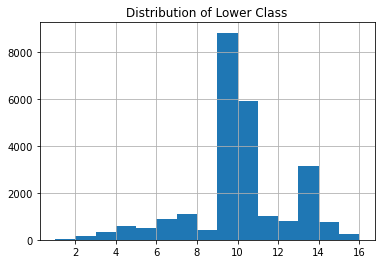

In [8]:
# NOTE: we will plot some epic histograms [Upper Class]!
plt.title('Distribution of Lower Class')
lower_income_hist = lower_income['education-num'].hist(bins=15)
plt.plot()

### E) Plot a histogram to see the distribution of adult ages who make more and less than $50k.

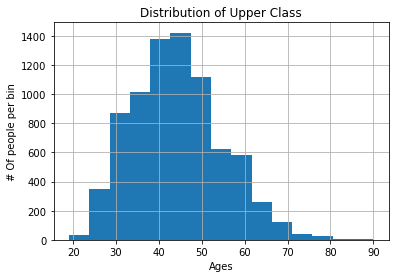

In [9]:
plt.title('Distribution of Upper Class')
plt.xlabel('Ages')
plt.ylabel('# Of people per bin')
upper_income_hist2 = upper_income['age'].hist(bins=15)

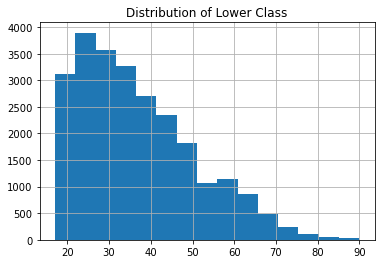

In [10]:
plt.title('Distribution of Lower Class')
lower_income_hist2 = lower_income['age'].hist(bins=15)

## Practice Plotting

### A) Plot at least one bar plot that shows a trend within a variable that does not have inter-relationship.

In [14]:
gamer = a_frame[['age']]
gamer.plot().bar()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'